# 2D Ising simulator in Fortran (Carlos Cardona)

<font color='blue'><font size=4>In this notebook we are collected all the code to generate the simulation of a simplified Ising model in two dimensions, including the Fortran files and its compilation.</font> 

In [ ]:
# Run this cell if you don't have numpy  or matplotlib installed in your system
!pip install numpy matplotlib 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
#import click

In [5]:
#plt.imshow(initial_state, interpolation='nearest', cmap='jet'

<font color='blue'><font size=4>The cell below control the parameters of the simple simulator. If you want to change the size of the lattice, change the value of N, to change the temperature change the value of T and to change the coupling constant J, change the value of jn. Then run the cell again. Notice that in Fortran, lines starting with exclamation mark ! are commented out.</font> 

In [22]:
%%writefile parameters0.inc

! N=one side lattice size;

    integer, parameter :: N=100, epochs = 100000000
    real(kind =8),  parameter :: T=2.5  ! Temperature
    real(kind =8),  parameter :: jn=1.0  ! Coupling constant

Overwriting parameters0.inc


<font color='blue'><font size=4>The code below compilaes the simulator, which is saved in the file 2DIsing_Simulator.f90 and storage the initial random choice of the lattice in a file called fort.1, and the final state of the lattice in the file fort.2 <br>
If you changed the parameter values in the cell above, you need to run the cell below, i.e, recompile the code.</font> 

In [25]:
!gfortran 2DIsing_Simulator.f90
!./a.out

<font color='blue'><font size=4>The we read the output of the simulator and plot the initial and final state.The simplest Ising model undergoes a phase transition at ${k T\over J}=2.269$. For a temperature below the one satisfying this value, we said that the system is in the ordered phase, pretty much analogous to the water in ice phase. When the temperature is above, we said the system is a disordered phase, similar to water in the gas phase. In the original version of this notebook we have run the code for a temperature below the critical temprature, and so below you can see how ordered the system becomes after evolving some 100 million epochs or so. If we were instead chosen to a temperature above the critical temperature, the final state will look pretty similar to the initial random state, which is quite disordered. </font> 

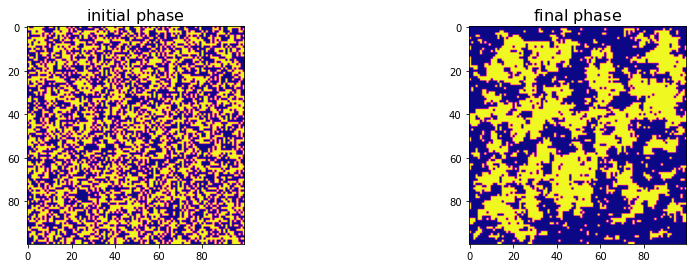

In [26]:
initial_state=np.loadtxt('fort.1')
final_state=np.loadtxt('fort.2')


##### plot a few Ising states
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set colourbar map
cmap_args=dict(cmap='plasma_r')

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=2)

axarr[0].imshow(initial_state.reshape(100,100),**cmap_args)
axarr[0].set_title('$\\mathrm{initial\\ phase}$',fontsize=16)
#axarr[0].tick_params(labelsize=16)


axarr[1].imshow(final_state.reshape(100,100),**cmap_args)
axarr[1].set_title('$\\mathrm{final\\ phase}$',fontsize=16)
#axarr[1].tick_params(labelsize=16)


fig.subplots_adjust(right=2.0)

plt.show()

<font color='blue'><font size=4>Finally, we run the magnetization.f90 file, which give us the magnetization as a function of the temperature. We can clearly see what happens in the phase transition, the average magnetization vanishes when the temperature is higher that a certain critical value, this is similar to say that an ice cube "lost its shape" when the temperature is increase above 0 celsius degrees. The units on the horizaontal line of the plot below, representing the Temperature are not at real scale.</font> 

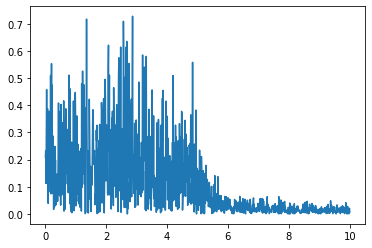

In [12]:
# Up to T=10 we can see the sharp phase transition at T=6
magn=np.transpose(np.loadtxt('fort.1')) 
plt.plot(magn[0],magn[1])
plt.show()